<a href="https://colab.research.google.com/github/xandeea/Atividade-Analise-de-dados/blob/main/Analise%20de%20dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importação das bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# leitura dos arquivos
relacionados = pd.read_csv('https://raw.githubusercontent.com/xandeea/Atividade-An-lise-de-dados/main/dados/AssuntosRelacionados.csv', encoding="ISO-8859-1", sep=";")
geo = pd.read_csv('https://raw.githubusercontent.com/xandeea/Atividade-Analise-de-dados/main/dados/Geo.csv', encoding="ISO-8859-1", sep=";", skiprows=2)
linha_tempo = pd.read_csv('https://raw.githubusercontent.com/xandeea/Atividade-Analise-de-dados/main/dados/LinhaTempo.csv', encoding="ISO-8859-1", sep=";")

In [3]:
# arrumando nome das colunas
geo.columns=['País', 'Valores']

# colocando a primeira letra em maiúsculo
geo['País'] = geo['País'].str.capitalize()

# trocando os valores NaN por 0
geo['Valores'] = geo['Valores'].fillna(0)

# criando uma coluna para dividir os países que tem e que não tem informação
geo['Possui valor'] = np.where(geo['Valores'] != 0, 1, 0)
geo.head()

,País,Valores,Possui valor
0,Índia,100.0,1
1,Ruanda,0.0,0
2,Singapura,87.0,1
3,Zimbábue,0.0,0
4,Etiópia,0.0,0


In [4]:
# arrumando nome das colunas
linha_tempo.columns=['Data','Score']

# separado a coluna data em duas novas colunas de ano e mês
linha_tempo[['Ano','Mês']] = linha_tempo['Data'].str.split('-', expand=True)

# transformando o tipo da coluna data
linha_tempo['Data'] = pd.to_datetime(linha_tempo["Data"], format = "%Y-%m")

linha_tempo.head()

,Data,Score,Ano,Mês
0,2004-01-01,11,2004,01
1,2004-02-01,10,2004,02
2,2004-03-01,10,2004,03
3,2004-04-01,9,2004,04
4,2004-05-01,6,2004,05


In [5]:
# dropando uma linha sem informações
relacionados.drop(index = relacionados.index[25], inplace=True)

#colocando a primeira letra em maiúsculo
relacionados['Termo'] = relacionados['Termo'].str.capitalize()

relacionados.head(5)

,Termo,Score
0,Dados,100
1,Ciência,100
2,Ciência de dados,100
3,Curso,12
4,Emprego,9


In [ ]:
# separando a tabela anterior em 2 tabelas, as que possuem score e as que possuem aumento repentino
relacionados_valor = relacionados.query("Score != 'Aumento repentino'")
aumento_repentino = relacionados.query("Score == 'Aumento repentino'")

# transformando o tipo da coluna score
relacionados_valor["Score"] = pd.to_numeric(relacionados_valor["Score"])

# **Análise dos dados**

## *Dos 250 países que a tabela possui, apenas 24% dos países apresentaram pesquisas suficientes de Data Science no Google (61 países)*

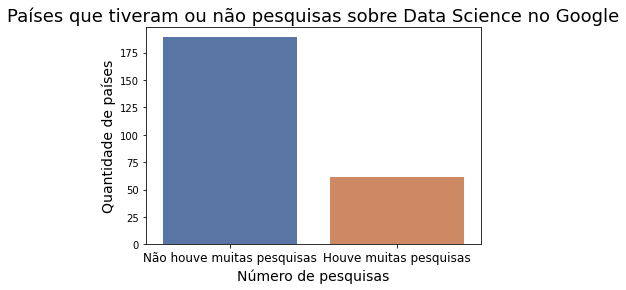

In [7]:
ax = sns.countplot(data=geo,x='Possui valor', palette="deep")
ax.set_title('Países que tiveram ou não pesquisas sobre Data Science no Google', fontsize=18)
ax.set_xlabel('Número de pesquisas', fontsize=14)
ax.set_ylabel('Quantidade de países', fontsize=14)
ax.set_xticklabels(["Não houve muitas pesquisas", "Houve muitas pesquisas"], fontsize=12)
plt.show()

## *Abaixo os 10 países que apresentaram maior proporção de pesquisas*

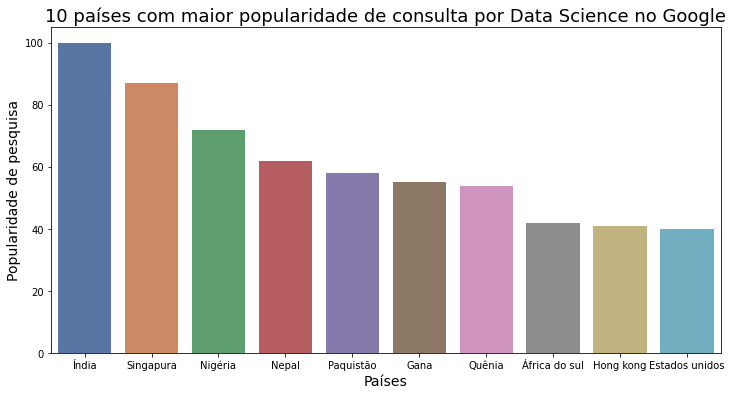

In [8]:
ax = sns.barplot(data=geo, x='País',y='Valores', palette="deep", order=geo.sort_values('Valores', ascending=False)['País'][:10])
ax.figure.set_size_inches(12,6)
ax.set_title('10 países com maior popularidade de consulta por Data Science no Google', fontsize=18)
ax.set_xlabel('Países', fontsize=14)
ax.set_ylabel('Popularidade de pesquisa', fontsize=14)
plt.show()

**Destes, apenas Singapura e Estados Unidos fazem parte dos 10 países mais tecnológicos do mundo¹**

¹ [Países mais tecnológicos](https://www.gov.br/inpi/pt-br/central-de-conteudo/noticias/brasil-ocupa-o-57deg-lugar-entre-os-132-paises-mais-inovadores)

## *Abaixo a quantidade de pesquisas com o passar do anos e também as médias por ano/mês*

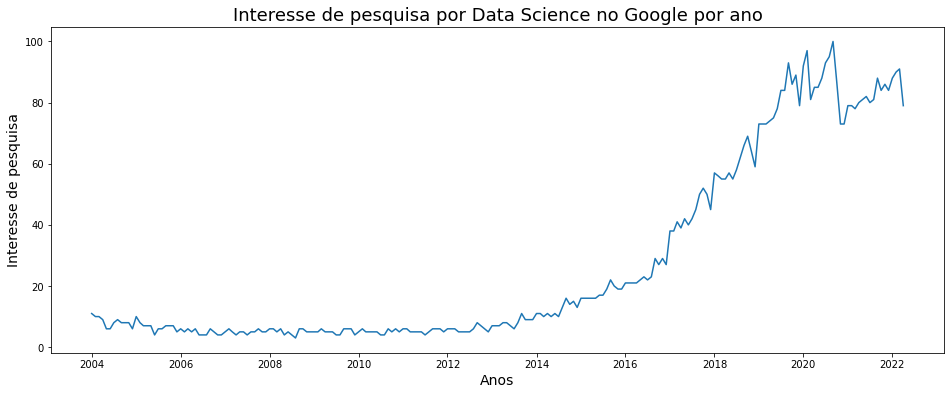

In [9]:
ax = sns.lineplot(data=linha_tempo,y='Score',x='Data')
ax.figure.set_size_inches(16,6)
ax.set_title('Interesse de pesquisa por Data Science no Google por ano', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax.set_ylabel('Interesse de pesquisa', fontsize=14)
plt.show()

In [10]:
pesquisas_por_ano = pd.DataFrame(linha_tempo.groupby('Ano')['Score'].mean()).sort_values(by='Score', ascending=False)
pesquisas_por_ano.head(10)

,Score
Ano,
2020,87.416667
2022,87.000000
2021,81.833333
2019,80.083333
2018,59.416667
2017,43.500000
2016,23.833333
2015,17.750000
2014,12.083333


In [11]:
pesquisas_por_mes = pd.DataFrame(linha_tempo.groupby('Mês')['Score'].mean()).sort_values(by='Score', ascending=False)
pesquisas_por_mes.head(10)

,Score
Mês,
09,29.611111
02,28.736842
01,28.526316
10,28.000000
03,27.789474
04,27.315789
11,27.055556
08,26.444444
07,25.277778


**Pode-se observar que houve um aumento bem considerável nos últimos anos, com duas subidas consideráveis, tanto em 2017 como mais recentemente em 2019 e vem mantendo um alto nível de pesquisa desde então**

**Em relação aos meses não possui nenhuma discrepância muito grande**

## *Abaixo os 10 termos relacionados com Data Science mais pesquisados e logo abaixo os temas que vem tendo um aumento nas pesquisas do Google*

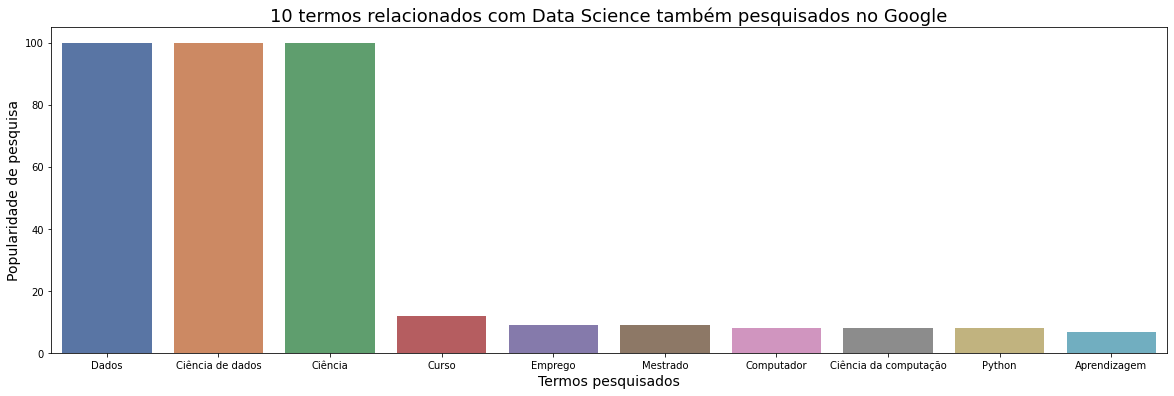

In [12]:
ax = sns.barplot(data=relacionados_valor, x='Termo',y='Score', palette="deep", order=relacionados_valor.sort_values('Score', ascending=False)['Termo'][:10])
ax.figure.set_size_inches(20,6)
ax.set_title('10 termos relacionados com Data Science também pesquisados no Google', fontsize=18)
ax.set_xlabel('Termos pesquisados', fontsize=14)
ax.set_ylabel('Popularidade de pesquisa', fontsize=14)
plt.show()

In [13]:
aumento_repentino

,Termo,Score
26,Python,Aumento repentino
27,Aprendizado de máquina,Aumento repentino
28,Máquina,Aumento repentino
29,Big data,Aumento repentino
30,Coursera,Aumento repentino
31,R,Aumento repentino
32,Certificação,Aumento repentino
33,Engenheiro,Aumento repentino
34,Universidade da califórnia,Aumento repentino
35,Certificação profissional,Aumento repentino


**Dos 10 termos mais pesquisados, muitos deles são palavras mais gerais, provavelmente buscando entender mais sobre a área. Enquanto no aumento repentino já possuem mais termos relacionados a cursos/universidades/especializações, provavelmente buscando entrarem na área**